Loading the data

In [1]:

from IPython.display import Image
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
data = read_csv('driver_features_2.txt', delimiter='\t',header=None)
X=data.iloc[:, 0:10].values
columns=['car_level','driver_authorized','gender',
     'age','license_issue_1','license_issue_2',
     'work_time','service_score','driver_income','driverver_online_time']
df = pd.DataFrame(X,columns=columns);

## Subsetting the data where car is 400 or 100

Subsetting the age between 25 and 35 

In [32]:
df11=df.loc[((df['car_level'] == 100) | (df['car_level']==400))& (df['age']>=25)&(df['age']<=35),];

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score,driver_income,driverver_online_time
15,100.0,1.0,1.0,33.0,2008.0,9.0,28.6153,76.3641,720.2306,2108.0
22,100.0,1.0,1.0,25.0,2011.0,9.0,19.6644,75.5279,1339.2087,47494.0
23,100.0,1.0,1.0,25.0,2011.0,9.0,19.3316,75.0230,1340.6496,47492.0
47,100.0,1.0,1.0,33.0,2008.0,12.0,16.6094,92.4280,924.9580,42106.0
48,100.0,1.0,1.0,33.0,2008.0,12.0,16.0182,92.4699,923.6343,42108.0
49,100.0,1.0,1.0,33.0,2008.0,12.0,16.5457,92.0957,923.0997,42109.0
50,100.0,1.0,1.0,33.0,2008.0,12.0,16.7555,92.5605,924.1254,42108.0
68,100.0,1.0,1.0,30.0,2009.0,4.0,29.2286,44.7797,63.0248,4171.0
69,100.0,1.0,1.0,30.0,2009.0,4.0,29.9295,44.4970,63.1837,4170.0
70,100.0,1.0,1.0,30.0,2009.0,4.0,29.3495,44.8376,59.5395,4172.0


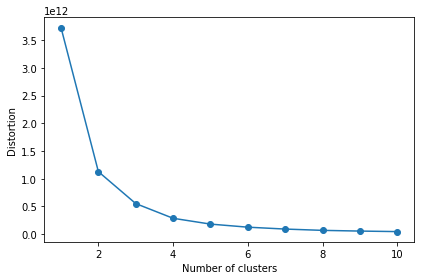

Distortion: 47449247600.97


In [17]:
X11=df11.as_matrix(columns=None)

distortions = []
from sklearn.cluster import KMeans
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X11)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()
print('Distortion: %.2f' % km.inertia_)

#### It is evident that there is only two cluster in this case

In [18]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, 
            init='random', 
            n_init=10, 
            max_iter=3000,
            tol=1e-10,
            random_state=0)

y11_km = km.fit_predict(X11)


We start with clusrter #1 

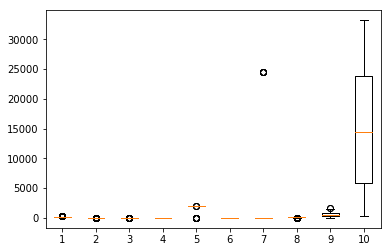

In [19]:
cl111=X_1_1[y11_km==0]
plt.boxplot(cl111);


In [20]:
df111 = pd.DataFrame(cl111,columns=columns)
df111.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score,driver_income,driverver_online_time
count,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000,4039.000000
mean,130.675910,0.900718,0.996039,30.908146,2003.701411,6.655608,58.742582,79.188854,542.675688,15266.848477
std,90.905487,0.299077,0.062822,2.983400,94.757823,3.469029,945.537478,13.859251,342.792149,9899.815547
min,100.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.002200,0.036200,13.073000,383.000000
25%,100.000000,1.000000,1.000000,28.000000,2006.000000,4.000000,16.543100,75.530650,258.338300,5811.000000
50%,100.000000,1.000000,1.000000,31.000000,2008.000000,7.000000,25.069800,82.880500,518.543200,14398.000000
75%,100.000000,1.000000,1.000000,34.000000,2011.000000,10.000000,30.147550,87.324650,789.524200,23880.000000
max,400.000000,1.000000,1.000000,35.000000,2015.000000,12.000000,24568.931800,100.882400,1736.060100,33180.000000


We now plan to see how cluster #2 behaves

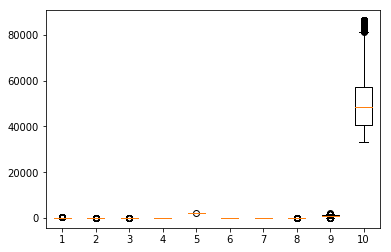

In [21]:
cl112=X11[y11_km==1]
plt.boxplot(cl112);

In [22]:
df112 = pd.DataFrame(cl112,columns=columns)
df112.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score,driver_income,driverver_online_time
count,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000
mean,144.848036,0.977761,0.992340,30.798863,2008.122313,6.711885,21.751757,79.777752,886.260617,51108.617000
std,106.985479,0.147477,0.087196,2.886735,3.212312,3.432927,10.147423,12.844931,317.695599,13411.479765
min,100.000000,0.000000,0.000000,25.000000,1998.000000,1.000000,0.018200,0.047300,19.791500,33220.000000
25%,100.000000,1.000000,1.000000,29.000000,2006.000000,4.000000,16.028150,75.801800,693.615250,40809.000000
50%,100.000000,1.000000,1.000000,31.000000,2008.000000,7.000000,24.501500,83.308100,920.094500,48612.000000
75%,100.000000,1.000000,1.000000,33.000000,2010.000000,10.000000,29.821400,87.502550,1098.881200,57035.000000
max,400.000000,1.000000,1.000000,35.000000,2015.000000,12.000000,40.930300,100.776000,1930.716900,86403.000000


In [23]:
df12=df.loc[((df['car_level'] == 100) | (df['car_level']==400))& (df['age']>35)&(df['age']<=45),];

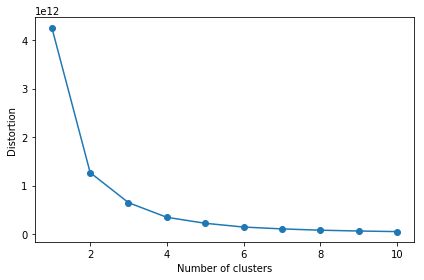

Distortion: 53725017917.25


In [24]:
X12=df12.as_matrix(columns=None)

distortions = []
from sklearn.cluster import KMeans
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X12)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()
print('Distortion: %.2f' % km.inertia_)

In [25]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, 
            init='random', 
            n_init=10, 
            max_iter=3000,
            tol=1e-10,
            random_state=0)

y12_km = km.fit_predict(X12)

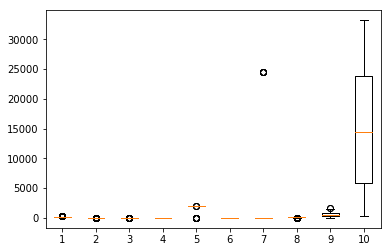

In [26]:
cl121=X12[y12_km==0]
plt.boxplot(cl111);


In [27]:
df121 = pd.DataFrame(cl121,columns=columns)
df121.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score,driver_income,driverver_online_time
count,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000
mean,147.582901,0.984618,0.983819,40.430683,2003.696165,6.612665,29.027142,81.680291,884.518146,51574.515781
std,109.604459,0.123077,0.126182,2.885198,5.046217,3.459310,347.031467,12.329201,310.041217,12303.896875
min,100.000000,0.000000,0.000000,36.000000,1989.000000,1.000000,0.042100,0.014900,17.044500,34102.000000
25%,100.000000,1.000000,1.000000,38.000000,1999.000000,4.000000,18.006150,78.733125,697.337175,42606.250000
50%,100.000000,1.000000,1.000000,40.000000,2004.000000,7.000000,27.747050,84.476500,921.898800,49316.000000
75%,100.000000,1.000000,1.000000,43.000000,2008.000000,10.000000,31.043125,88.392350,1095.724525,57215.000000
max,400.000000,1.000000,1.000000,45.000000,2014.000000,12.000000,24568.885300,100.965300,2052.520400,86404.000000


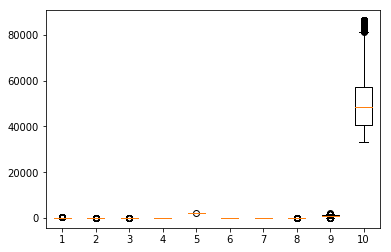

In [29]:
cl122=X12[y12_km==0]
plt.boxplot(cl112);


In [30]:
df122 = pd.DataFrame(cl122,columns=columns)
df122.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score,driver_income,driverver_online_time
count,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000,5006.000000
mean,147.582901,0.984618,0.983819,40.430683,2003.696165,6.612665,29.027142,81.680291,884.518146,51574.515781
std,109.604459,0.123077,0.126182,2.885198,5.046217,3.459310,347.031467,12.329201,310.041217,12303.896875
min,100.000000,0.000000,0.000000,36.000000,1989.000000,1.000000,0.042100,0.014900,17.044500,34102.000000
25%,100.000000,1.000000,1.000000,38.000000,1999.000000,4.000000,18.006150,78.733125,697.337175,42606.250000
50%,100.000000,1.000000,1.000000,40.000000,2004.000000,7.000000,27.747050,84.476500,921.898800,49316.000000
75%,100.000000,1.000000,1.000000,43.000000,2008.000000,10.000000,31.043125,88.392350,1095.724525,57215.000000
max,400.000000,1.000000,1.000000,45.000000,2014.000000,12.000000,24568.885300,100.965300,2052.520400,86404.000000


## Subsetting the data where car is 500

In [10]:
df_2=df.loc[df['car_level'] == 500];

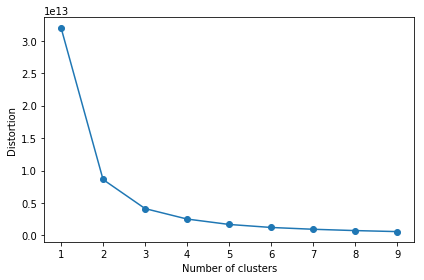

Distortion: 593059321643.87


In [11]:
X_2=df_2.as_matrix(columns=None)

distortions = []
from sklearn.cluster import KMeans
for i in range(1, 10):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X_2)
    distortions.append(km.inertia_)
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()
print('Distortion: %.2f' % km.inertia_)

Here again there are two clusters only

In [12]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, 
            init='random', 
            n_init=10, 
            max_iter=3000,
            tol=1e-10,
            random_state=0)

y_2_km = km.fit_predict(X_2)

Cluster #1 


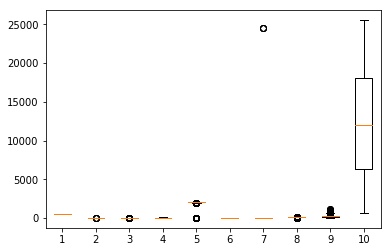

In [13]:
cl_2_1=X_2[y_2_km==0]
plt.boxplot(cl_2_1);


In [14]:
df_2_1 = pd.DataFrame(cl_2_1,columns=columns)
df_2_1.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score,driver_income,driverver_online_time
count,81288.0,81288.000000,81288.000000,81288.000000,81288.000000,81288.000000,81288.000000,81288.000000,81288.000000,81288.000000
mean,500.0,0.000062,0.926361,39.178390,1974.978016,6.618480,17.344721,84.140736,207.250209,12348.242471
std,0.0,0.007843,0.261185,8.713154,242.047415,3.473491,172.580376,9.477753,136.058351,7006.745886
min,500.0,0.000000,0.000000,21.000000,0.000000,0.000000,0.000400,0.015800,4.418100,604.000000
25%,500.0,0.000000,1.000000,32.000000,1999.000000,4.000000,4.389725,81.446925,94.054125,6320.000000
50%,500.0,0.000000,1.000000,38.000000,2006.000000,7.000000,16.877300,85.978500,193.469700,11978.000000
75%,500.0,0.000000,1.000000,46.000000,2010.000000,9.000000,27.255375,89.125900,297.261200,18140.000000
max,500.0,1.000000,1.000000,61.000000,2017.000000,12.000000,24568.974600,100.998600,1202.082300,25540.000000


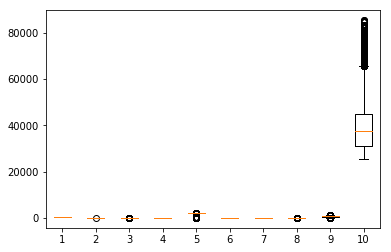

In [15]:
cl_2_2=X_2[y_2_km==1]
plt.boxplot(cl_2_2);

In [16]:
df_2_2 = pd.DataFrame(cl_2_2,columns=columns)
df_2_2.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score,driver_income,driverver_online_time
count,57337.0,57337.000000,57337.000000,57337.000000,57337.000000,57337.000000,57337.000000,57337.000000,57337.000000,57337.000000
mean,500.0,0.000017,0.951986,39.075135,1992.896489,6.623855,16.340403,86.221827,624.813817,38730.753144
std,0.0,0.004176,0.213798,8.454324,160.950551,3.453893,10.571264,5.890464,186.424928,8976.166611
min,500.0,0.000000,0.000000,20.000000,0.000000,0.000000,0.000100,0.289600,11.718400,25539.000000
25%,500.0,0.000000,1.000000,32.000000,2003.000000,4.000000,5.223600,83.831300,495.467100,31289.000000
50%,500.0,0.000000,1.000000,39.000000,2007.000000,7.000000,17.051300,86.886100,620.113800,37688.000000
75%,500.0,0.000000,1.000000,46.000000,2010.000000,10.000000,26.253000,89.297600,757.477500,45006.000000
max,500.0,1.000000,1.000000,61.000000,2017.000000,12.000000,40.950700,100.994200,1386.459500,85475.000000


## Subsetting the data where car is 900

In [17]:
df_3=df.loc[df['car_level'] == 900];

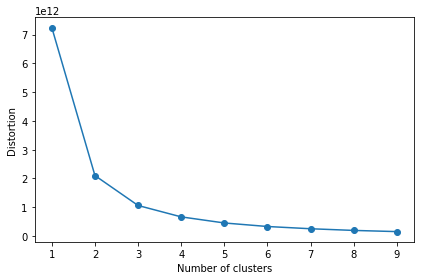

Distortion: 154937669891.00


In [18]:
X_3=df_3.as_matrix(columns=None)

distortions = []
from sklearn.cluster import KMeans
for i in range(1, 10):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X_3)
    distortions.append(km.inertia_)
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()
print('Distortion: %.2f' % km.inertia_)

In [19]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, 
            init='random', 
            n_init=10, 
            max_iter=3000,
            tol=1e-10,
            random_state=0)

y_3_km = km.fit_predict(X_3)


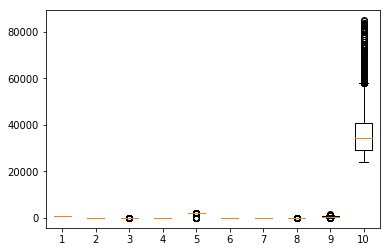

In [20]:
cl_3_1=X_3[y_3_km==0]
plt.boxplot(cl_3_1);


In [21]:
df_3_1 = pd.DataFrame(cl_3_1,columns=columns)
df_3_1.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score,driver_income,driverver_online_time
count,16983.0,16983.0,16983.000000,16983.000000,16983.000000,16983.000000,16983.000000,16983.000000,16983.000000,16983.000000
mean,900.0,0.0,0.968145,40.828829,2001.867573,6.585232,20.216598,86.557575,617.075108,35798.219101
std,0.0,0.0,0.175620,8.334004,69.032130,3.424853,8.928105,4.906032,184.265874,8358.719926
min,900.0,0.0,0.000000,21.000000,0.000000,0.000000,0.005500,60.027300,13.294400,24169.000000
25%,900.0,0.0,1.000000,35.000000,2000.000000,4.000000,15.120050,84.144650,487.198300,29191.000000
50%,900.0,0.0,1.000000,41.000000,2006.000000,7.000000,20.793300,86.615100,608.379900,34524.000000
75%,900.0,0.0,1.000000,47.000000,2009.000000,9.000000,28.343650,89.067600,736.722950,40780.500000
max,900.0,0.0,1.000000,61.000000,2016.000000,12.000000,40.421600,100.873700,1590.137300,85015.000000


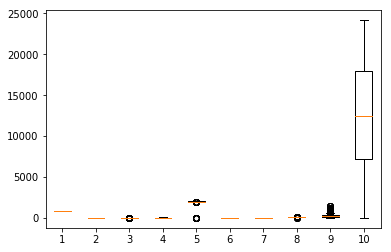

In [22]:
cl_3_2=X_3[y_3_km==1]
plt.boxplot(cl_3_2);


In [23]:
df_3_2 = pd.DataFrame(cl_3_2,columns=columns)
df_3_2.describe()

,car_level,driver_authorized,gender,age,license_issue_1,license_issue_2,work_time,service_score,driver_income,driverver_online_time
count,21588.0,21588.0,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000
mean,900.0,0.0,0.957291,40.963545,1999.591208,6.640634,19.541720,86.253066,232.928772,12545.716370
std,0.0,0.0,0.202205,8.753096,79.713585,3.429116,9.284100,5.335008,146.535566,6506.738463
min,900.0,0.0,0.000000,21.000000,0.000000,0.000000,0.011900,42.256400,10.649300,40.000000
25%,900.0,0.0,1.000000,34.000000,1997.000000,4.000000,12.497325,83.790400,120.787275,7237.500000
50%,900.0,0.0,1.000000,41.000000,2004.000000,7.000000,20.100750,86.572050,220.645950,12491.500000
75%,900.0,0.0,1.000000,48.000000,2008.000000,10.000000,28.260625,89.189375,321.158400,18013.500000
max,900.0,0.0,1.000000,61.000000,2016.000000,12.000000,40.669300,99.994700,1442.808000,24167.000000


### Lets now work and do some regression analysis


First with the car level 400 and 100

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
X1=df_1[['gender','age','service_score','driverver_online_time']]
Y1=df_1[['driver_income']]
X1 = sm.add_constant(X1)
est = sm.OLS(Y1, X1).fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          driver_income   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     1826.
Date:                Sun, 04 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:34:22   Log-Likelihood:            -1.6714e+05
No. Observations:               23266   AIC:                         3.343e+05
Df Residuals:                   23261   BIC:                         3.343e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   320.1708     24.146     13.260      0.000     272.843     367.499
gender                   -5.8816     16.809     -0.350      0.726     -38.828      27.065
age                      -2.4899      0.275     -9.040      0.000      -3.030      -1.950
service_score             2.5857      0.166     15.534      0.000       2.259       2.912
driverver_online_time     0.0083      0.000     82.749      0.000       0.008       0.008
==============================================================================
Omnibus:                       66.277   Durbin-Watson:                   0.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.806
Skew:                           0.131   Prob(JB):                     3.11e-15
Kurtosis:                       2.997   Cond. No.                     5.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For 500 Level Cars

In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
X2=df_2[['gender','age','service_score','driverver_online_time']]
Y2=df_2[['driver_income']]
X2 = sm.add_constant(X2)
est = sm.OLS(Y2, X2).fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          driver_income   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                 1.437e+05
Date:                Sun, 04 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:34:24   Log-Likelihood:            -8.5391e+05
No. Observations:              138625   AIC:                         1.708e+06
Df Residuals:                  138620   BIC:                         1.708e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -43.4025      3.669    -11.831      0.000     -50.593     -36.212
gender                   21.7152      1.269     17.106      0.000      19.227      24.203
age                      -0.9884      0.036    -27.631      0.000      -1.059      -0.918
service_score             1.0335      0.038     27.363      0.000       0.960       1.108
driverver_online_time     0.0152   2.05e-05    740.730      0.000       0.015       0.015
==============================================================================
Omnibus:                    70615.572   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2049715.079
Skew:                          -1.882   Prob(JB):                         0.00
Kurtosis:                      21.458   Cond. No.                     3.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
X3=df_3[['gender','age','service_score','driverver_online_time']]
Y3=df_3[['driver_income']]
X3 = sm.add_constant(X3)
est = sm.OLS(Y3, X3).fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          driver_income   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                 2.879e+04
Date:                Sun, 04 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:34:26   Log-Likelihood:            -2.4128e+05
No. Observations:               38571   AIC:                         4.826e+05
Df Residuals:                   38566   BIC:                         4.826e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.3921     11.633     -0.120      0.905     -24.192      21.408
gender                   23.8889      3.365      7.100      0.000      17.294      30.484
age                      -1.1097      0.075    -14.792      0.000      -1.257      -0.963
service_score             0.7492      0.125      5.996      0.000       0.504       0.994
driverver_online_time     0.0159   4.69e-05    337.853      0.000       0.016       0.016
==============================================================================
Omnibus:                    12528.131   Durbin-Watson:                   0.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           422050.283
Skew:                          -0.916   Prob(JB):                         0.00
Kurtosis:                      19.101   Cond. No.                     4.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### After taking off driver online time